<a href="https://colab.research.google.com/github/dsogden/Quantitative_Finance/blob/main/Regression_Model_Instability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from statsmodels import regression, stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy as sp

def linreg(X, Y):
    x = sm.add_constant(X)
    model = regression.linear_model.OLS(Y, x).fit()
    return model.params[0], model.params[1]

## Biased Noise

Slope: 0.009072503822685526, intercept: -0.40207744085303815



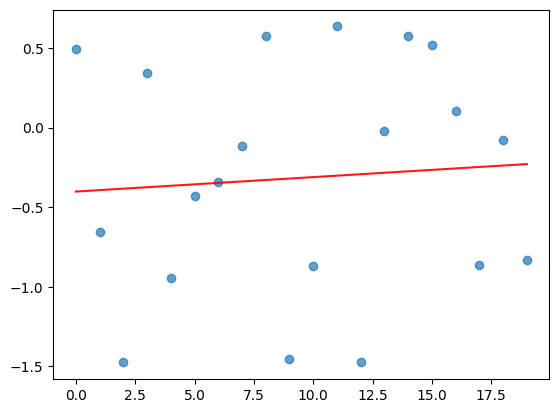

In [2]:
np.random.seed(107)
rand = np.random.randn(20)

xs = np.arange(20)
a, b = linreg(xs, rand)
print(f'Slope: {b}, intercept: {a}\n')

plt.scatter(xs, rand, alpha=0.7)
Y_hat = xs * b + a
plt.plot(xs, Y_hat, 'r', alpha=0.9)
plt.show()

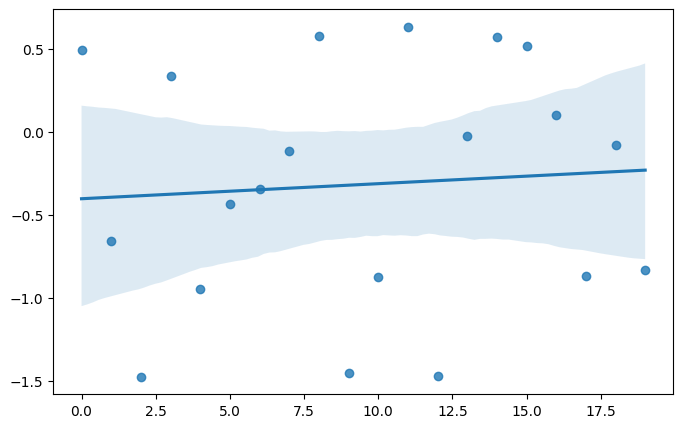

In [7]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(8, 5))
sns.regplot(x=xs, y=rand, ax=ax)
plt.show()

Slope: 0.003145436876100659, intercept: -0.01895071779148164


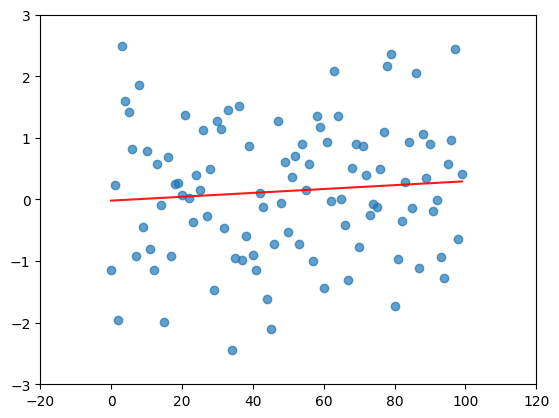

In [10]:
rand2 = np.random.randn(100)

xs2 = np.arange(100)
a2, b2 = linreg(xs2, rand2)
print(f'Slope: {b2}, intercept: {a2}')

plt.scatter(xs2, rand2, alpha=0.7)
Y_hat2 = xs2 * b2 + a2
plt.plot(xs2, Y_hat2, 'r', alpha=0.9)
plt.xlim([-20, 120])
plt.ylim([-3, 3])
plt.show()

## Regime changes

In [12]:
import yfinance as yf

start = '2003-01-01'
end = '2009-02-01'
pricing = yf.download('SPY', start=start, end=end)['Close']

breakpoint = 1200
xs = np.arange(pricing.shape[0])
xs2 = np.arange(breakpoint)
xs3 = np.arange(pricing.shape[0] - breakpoint)

a, b = linreg(xs, pricing)
a2, b2 = linreg(xs2, pricing[:breakpoint])
a3, b3 = linreg(xs3, pricing[breakpoint:])

Y_hat = pd.Series(xs * b + a, index=pricing.index)
Y_hat2 = pd.Series(xs2 * b2 + a2, index=pricing.index[:breakpoint])
Y_hat3 = pd.Series(xs3 * b3 + a3, index=pricing.index[breakpoint:])

[*********************100%%**********************]  1 of 1 completed


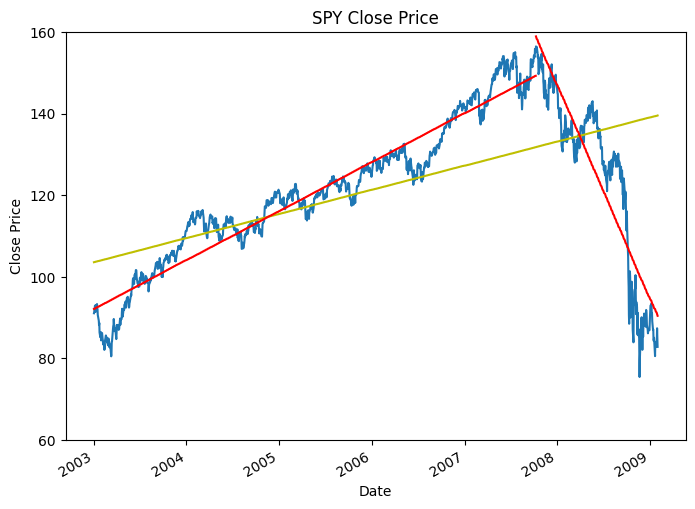

In [16]:
fig, ax = plt.subplots(figsize=(8, 6))
pricing.plot(ax=ax)
Y_hat.plot(color='y', ax=ax)
Y_hat2.plot(color='r', ax=ax)
Y_hat3.plot(color='r', ax=ax)
plt.title('SPY Close Price')
ax.set_ylabel('Close Price')
ax.set_ylim([60, 160])
plt.show()

In [17]:
stats.diagnostic.breaks_cusumolsresid(
    regression.linear_model.OLS(pricing, sm.add_constant(xs)).fit().resid)[1]

6.072688230146828e-59

## Multicollinearity

In [24]:
start = '2013-01-01'
end = '2015-01-01'

b1 = yf.download('SPY', start=start, end=end)['Close']
b2 = yf.download('MDY', start=start, end=end)['Close']
asset = yf.download('V', start=start, end=end)['Close']

mlr = regression.linear_model.OLS(
    asset, sm.add_constant(np.column_stack((b1, b2)))
).fit()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [19]:
prediction = mlr.params[0] + mlr.params[1] * b1 + mlr.params[2] * b2
print(f'Constant: {mlr.params[0]}, MLR Beta SPY: {mlr.params[1]}, MLR Beta MDY: {mlr.params[2]}')

Constant: -16.331041425941322, MLR Beta SPY: 0.2480728160649699, MLR Beta MDY: 0.09474221803934557


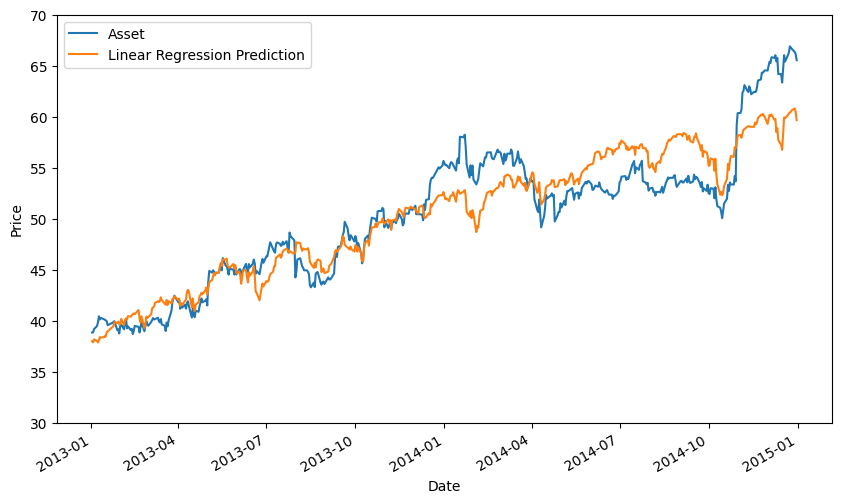

In [23]:
fig, ax = plt.subplots(figsize=(10, 6))
asset.plot(ax=ax)
prediction.plot(ax=ax)
ax.set_ylabel('Price')
ax.set_ylim([30, 70])
ax.legend(['Asset', 'Linear Regression Prediction'])
plt.show()

In [25]:
start = '2013-01-01'
end = '2015-06-01'

b1 = yf.download('SPY', start=start, end=end)['Close']
b2 = yf.download('MDY', start=start, end=end)['Close']
asset = yf.download('V', start=start, end=end)['Close']

mlr = regression.linear_model.OLS(
    asset, sm.add_constant(np.column_stack((b1, b2)))
).fit()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Constant: -28.414393005214876, MLR Beta SPY: 0.17943776234835704, MLR Beta MDY: 0.2009111945808873



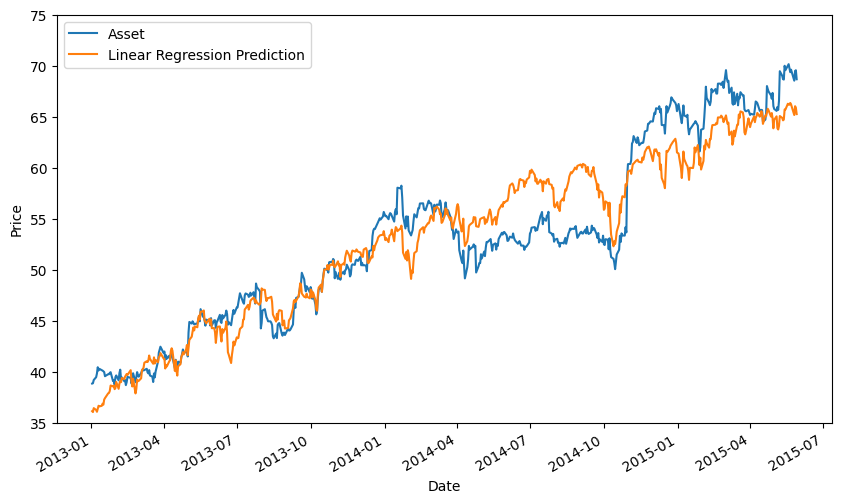

In [27]:
prediction = mlr.params[0] + mlr.params[1] * b1 + mlr.params[2] * b2
print(f'Constant: {mlr.params[0]}, MLR Beta SPY: {mlr.params[1]}, MLR Beta MDY: {mlr.params[2]}\n')

fig, ax = plt.subplots(figsize=(10, 6))
asset.plot(ax=ax)
prediction.plot(ax=ax)
ax.set_ylabel('Price')
ax.set_ylim([35, 75])
ax.legend(['Asset', 'Linear Regression Prediction'])
plt.show()

In [28]:
sp.stats.pearsonr(b1, b2)

PearsonRResult(statistic=0.9886408352402014, pvalue=0.0)